In [0]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn.datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline

In [0]:
train = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/train.csv")
#test = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# Free some space
del train

# Normalize the data
X_train = np.array(X_train) / 255.0
# One-hot coding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [0]:
# Transpose X, Y
X_train = np.array(X_train.T)
Y_train = np.array(Y_train.T)
X_val = np.array(X_val.T)
Y_val = np.array(Y_val.T)

In [4]:
# Check shape of X, Y
print ("X_train.shape = " + str(X_train.shape)
        + "\nY_train.shape = " + str(Y_train.shape))
print ("X_val.shape = " + str(X_val.shape)
        + "\nY_val.shape = " + str(Y_val.shape))

X_train.shape = (784, 37800)
Y_train.shape = (10, 37800)
X_val.shape = (784, 4200)
Y_val.shape = (10, 4200)


In [0]:
# Define the number of the nodes in the input layer and output layer
n_x = X_train.shape[0]
n_y = Y_train.shape[0]

In [0]:
def initialize_parameters(n_x, n_y):
  W = np.random.randn(n_y, n_x) * 0.01
  b = np.zeros(shape=(n_y,1))
  
  parameters = {"W" : W,
                "b" : b}
  return parameters

In [0]:
def theta(z):
  s = np.exp(z) / np.sum(np.exp(z), axis=0)
  return s

In [0]:
def forward_propagation(X, parameters_X):
    W = parameters_X["W"]
    b = parameters_X["b"]

    Z = np.dot(W, X) + b
    A = theta(Z)

    cache = {"A" : A,
             "Z" : Z}
    return A, cache

In [0]:
def compute_cost(A, Y):
    m = Y.shape[1]      #number of training examples
    loss = - np.sum(np.multiply(Y, np.log(A)))
    cost = loss / m
    cost = np.squeeze(cost)  

    return cost

In [0]:
def backward_propagation(X, Y, parameters, cache):
    W = parameters["W"]
    b = parameters["b"]
    A = cache["A"]
    m = X.shape[1]

    dZ = A - Y
    dW = (1 / m) * np.dot(dZ, X.T)
    db = (1 / m) * np.squeeze(np.sum(dZ, keepdims=True))
    
    grads = {"dW" : dW,
            "db" : db}
    return grads

In [0]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    W = parameters["W"]
    b = parameters["b"]

    dW = grads["dW"]
    db = grads["db"]

    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {"W" : W,
                  "b" : b}

    return parameters

In [0]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    m = X.shape[1]
    mini_batches = []
    np.random.seed(seed)

    # Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))

    num_complete_minibatches = math.floor(m / mini_batch_size) 

    #Partition 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size:(k+1) 
                                    * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size:(k+1)
                                    * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % mini_batch_size !=0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:, num_complete_minibatches
                                    * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches
                                    * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [0]:
def sm_model(X, Y, num_epochs=10000, learning_rate=0.05, mini_batch_size=64, 
             print_cost=False):
    parameters = initialize_parameters(n_x, n_y)
    W = parameters["W"]
    b = parameters["b"]
    seed = 14
    m = X.shape[1]
    costs = []

    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:
            #Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            #foward propagation
            A, cache = forward_propagation(minibatch_X, parameters)

            cost_total += compute_cost(A, minibatch_Y)
            #backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, parameters,
                                         cache)

            #update parameter
            parameters = update_parameters(parameters, grads, learning_rate)

        cost_avg = cost_total / len(minibatches)
        if (print_cost and i%100 == 0):
            print ("Cost after iteration %i: %f" % (i, cost_avg))
        if (print_cost and i%100 == 0):
            costs.append(cost_avg)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

In [0]:
def predict(parameters, X):
    A, cache = forward_propagation(X, parameters)
    predictions = np.round(A)
    return predictions

Cost after iteration 0: 0.828849
Cost after iteration 100: 0.255821
Cost after iteration 200: 0.242088
Cost after iteration 300: 0.234047
Cost after iteration 400: 0.229026
Cost after iteration 500: 0.224898
Cost after iteration 600: 0.222467
Cost after iteration 700: 0.219861
Cost after iteration 800: 0.217531
Cost after iteration 900: 0.215874
Cost after iteration 1000: 0.213842
Cost after iteration 1100: 0.212534
Cost after iteration 1200: 0.211146
Cost after iteration 1300: 0.210301
Cost after iteration 1400: 0.209053
Cost after iteration 1500: 0.208395
Cost after iteration 1600: 0.207476
Cost after iteration 1700: 0.206503
Cost after iteration 1800: 0.206133
Cost after iteration 1900: 0.205038
Cost after iteration 2000: 0.203963
Cost after iteration 2100: 0.203334
Cost after iteration 2200: 0.203323
Cost after iteration 2300: 0.202342
Cost after iteration 2400: 0.202377


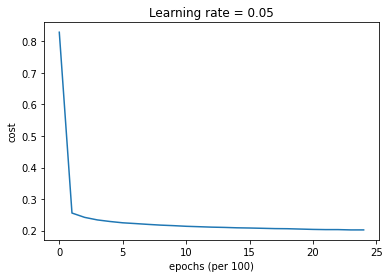

In [15]:
parameters_model = sm_model(X_train, Y_train, num_epochs=2500,
                            learning_rate=0.05, mini_batch_size=128,
                            print_cost=True)

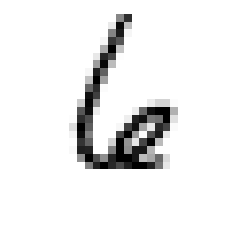

6
6


In [37]:
Y_hat = predict(parameters_model, X_val)

# Print image
image_id = 188
plt.imshow(X_val[:, image_id].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

# Prediction
Y_hat_label = np.argmax(Y_hat, axis=0)
print(Y_hat_label[image_id])

# True label
Y_val_label = np.argmax(Y_val, axis=0)
print(Y_val_label[image_id])


In [38]:
# Prediction accuracy
score = 100 * accuracy_score(Y_val_label, Y_hat_label)
print("Model accuracy score: %0.2f" %score)

Model accuracy score: 90.98
